## 📝 Énoncés des Exercices 1 & 2 (SQLA → Pandas → Seaborn)

Ces exercices sont conçus pour mettre en œuvre le pipeline en **trois étapes** : Requête SQL (SQLAlchemy), Chargement en DataFrame (Pandas) et Visualisation (Seaborn).

In [38]:
from sqlalchemy import create_engine, text
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

# palette: noir et rouge
sns.set_palette(["red", "black", "gray"])

### Exercice 1 : Distribution des Taux de Location (Taux d'Emprunt)

Cet exercice permet de visualiser la distribution d'une variable numérique simple.

1.  **Requête SQL :** Écrivez une requête SQL pour sélectionner uniquement le champ **`rental_rate`** (taux de location) de la table `^^film^^`.
2.  **Conversion Pandas :** Chargez les résultats de la requête SQL dans un DataFrame Pandas.
3.  **Visualisation (Seaborn) :** Créez un **histogramme** (*histplot*) avec Seaborn pour visualiser la **distribution** de la colonne `rental_rate`.


In [33]:
# path to file
DB_FILE = "sakila_master.db"   

# creer d'engine
engine = create_engine(f"sqlite:///{DB_FILE}", echo=False)
print(f"Connexion établie à la base de données : {DB_FILE}\n")

Connexion établie à la base de données : sakila_master.db



In [34]:
def read_query_df(requete: str) -> pd.DataFrame:
    """
    Exécute une requête SQL et renvoie le résultat sous forme de DataFrame.

    Args:
        requete (str): La requête SQL à exécuter.

    Returns:
        pd.DataFrame: Le DataFrame contenant les données résultantes.

    Raises:
        Exception: Une erreur est affichée si la récupération ou l'exécution
            de la requête échoue.
    """

    try:
        with engine.connect() as conn:
            df = pd.read_sql(text(requete), conn)

        return df

    except Exception as e:
        print(f"Une erreur s'est produite dans la récupération des données...")

In [35]:
# Visualisation de la base de données
req = """
SELECT * 
FROM sqlite_master 
WHERE type='table';
"""

df = read_query_df(req)
df

,type,name,tbl_name,rootpage,sql
0,table,actor,actor,2,CREATE TABLE actor (\n actor_id numeric NOT N...
1,table,country,country,5,CREATE TABLE country (\n country_id SMALLINT ...
2,table,city,city,9,"CREATE TABLE city (\n city_id int NOT NULL,\n..."
3,table,address,address,13,CREATE TABLE address (\n address_id int NOT N...
4,table,language,language,17,CREATE TABLE language (\n language_id SMALLIN...
5,table,category,category,19,CREATE TABLE category (\n category_id SMALLIN...
6,table,customer,customer,22,CREATE TABLE customer (\n customer_id INT NOT...
7,table,film,film,29,"CREATE TABLE film (\n film_id int NOT NULL,\n..."
8,table,film_actor,film_actor,35,CREATE TABLE film_actor (\n actor_id INT NOT ...
9,table,film_category,film_category,40,CREATE TABLE film_category (\n film_id INT NO...


,rental_rate
0,0.99
1,4.99
2,2.99
3,2.99
4,2.99


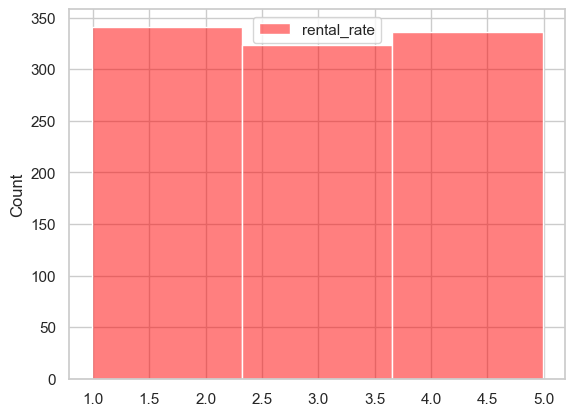

In [42]:
# Visualisation de la rental rate
req = """
SELECT rental_rate 
FROM film ;
"""

df = read_query_df(req)
sns.histplot(df, bins=3 )
df.head(5)

### Exercice 2 : Durée Moyenne des Films par Classification

Cet exercice utilise une fonction d'agrégation SQL et une visualisation pour la comparaison de catégories.

1.  **Requête SQL :** Écrivez une requête SQL pour calculer la **durée moyenne** (`AVG(length)`) de tous les films pour **chaque classification** (`rating` - ex: G, PG, R) dans la table `^^film^^`.
    * *Indice : Vous devrez utiliser la clause `GROUP BY`.*
2.  **Conversion Pandas :** Chargez les résultats (la classification et sa durée moyenne) dans un DataFrame Pandas.
3.  **Visualisation (Seaborn) :** Créez un **diagramme à barres** (*barplot*) avec Seaborn pour comparer visuellement la durée moyenne (`avg_length`) pour chaque catégorie de classification (`rating`).

,rating,avg
0,G,111.050562
1,NC-17,113.228571
2,PG,112.005155
3,PG-13,120.443946
4,R,118.661538


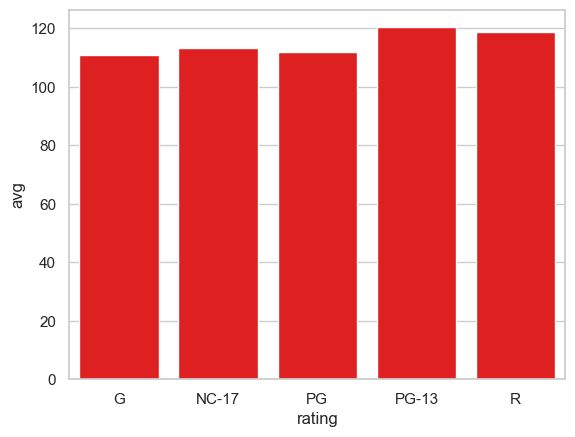

In [37]:
# Visualisation de la base de données
req = """
SELECT rating, AVG(length) as avg
FROM film 
GROUP BY rating;
"""

df = read_query_df(req)
sns.barplot(data=df, x='rating', y='avg')
df